# Part II - FordGoBike
## by Nyaga Derrick

## Investigation Overview
My intentions were to get to know how long trips fair across a week. Distrubtion of ages, Distribtion of trips in terms of times of day. and trip duration and how various features or columns in the dataset relate with user type(customer and subsciber)

## Dataset Overview
The data includes information regarding 183,412 rides with 16 columns, they include:
duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip

After data cleaning and combination of columns resulted to the having the following columns:
start_time, end_time ,  start_station_name , end_station_name, user_type, member_gender , day_of_week , start_hour , time_of_day, duration_min,  member_age,  age_group,  member_age_ratio.

Hence resulting to 183,412 rides and 13 columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df_new = pd.read_csv('fordgobike.csv')

## Trips taken in terms of week days

Most trips are taken on Thurday while lowest on sunday

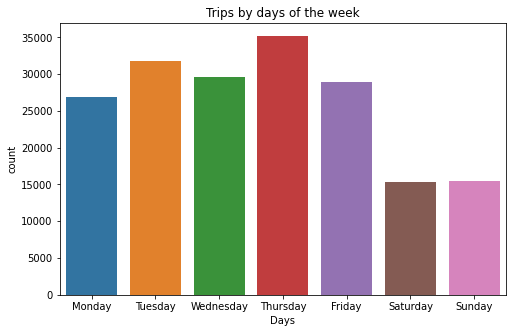

In [7]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# lets plot the distribution
plt.figure(figsize=[8, 5])

sb.countplot(data = df_new ,x ='day_of_week' ,order= weekday)
plt.title('Trips by days of the week')
plt.xlabel('Days')
plt.show()


## Distribution of trip duration

The duration picks at around 10 mins.

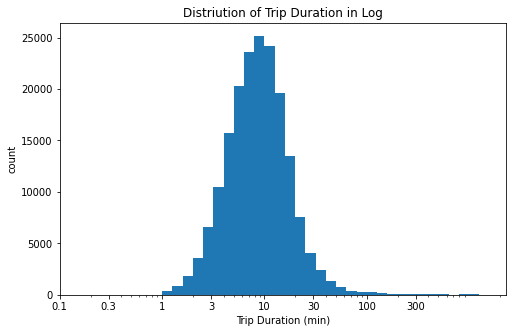

In [8]:
# trip duration distribution in log scale
binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df_new['duration_min'].max())+binsize, binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = df_new, x = 'duration_min',bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (min)')
plt.ylabel('count')
plt.title('Distriution of Trip Duration in Log')
plt.show()

## Distribution in terms of time of day
 Most journeys is the afternoon (12:00–17:59), followed by the morning (00:00 - 11:59 hours of the day)


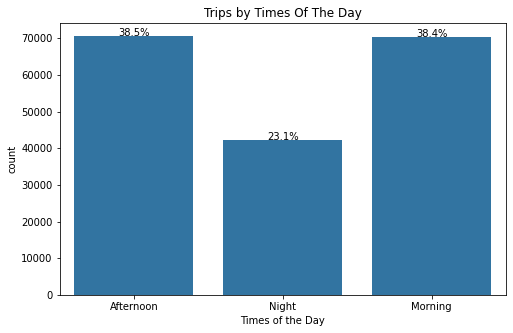

In [9]:
#lets plot the distribution
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
sb.countplot(data = df_new , x ='time_of_day', color =base_color)
points = df_new.shape[0]
members_count = df_new['time_of_day'].value_counts()
locs,lables = plt.xticks()

#lets plot the Bar chart
for loc, label in zip(locs,lables):
    count= members_count[label.get_text()]
    string = '{:0.1f}%'.format(100*count/points)
    plt.text(loc, count-8,string, ha = 'center')
    
plt.title("Trips by Times Of The Day")
plt.xlabel('Times of the Day')
plt.show()

## Distribution Of Ages

Most people between the age of 31-40 use the fordgobike more as compared to other age ratios, while age 21-30 is the second highest.

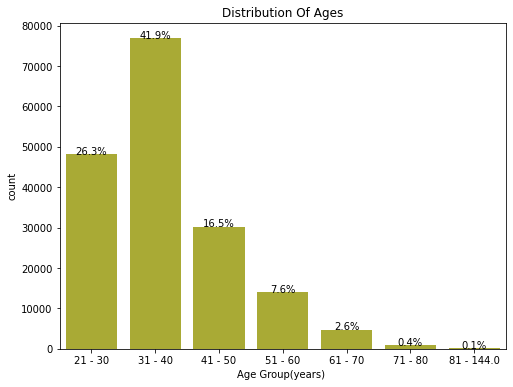

In [10]:
#lets plot the distribution
plt.figure(figsize=[8,6])
base_color = sb.color_palette()[8]
sb.countplot(data = df_new.sort_values(['member_age_ratio']) , x ='member_age_ratio', color =base_color)
points = df_new.shape[0]
members_count = df_new['member_age_ratio'].value_counts()
locs,lables = plt.xticks()

#lets plot the Bar chart
for loc, label in zip(locs,lables):
    count= members_count[label.get_text()]
    string = '{:0.1f}%'.format(100*count/points)
    plt.text(loc, count-8,string, ha = 'center')
    
plt.title ('Distribution Of Ages')
plt.xlabel('Age Group(years) ')
plt.ylabel('count')
plt.show()

## Average Trip Duration Per Age Group
The ages between 21 -80 not including 80-144 as they are out the scope we see that the duration of trips is almost similar and ages 51-70 have the highest duration

Text(0, 0.5, 'Trip duration(mins)')

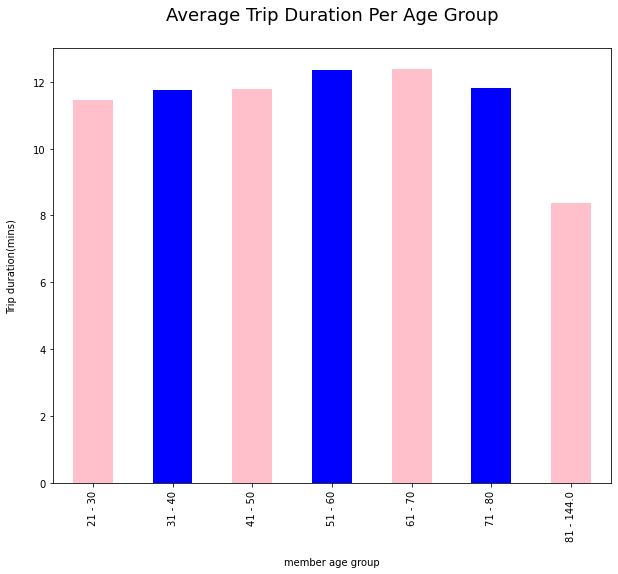

In [11]:
color = ['pink','blue' ]
df_new.groupby('member_age_ratio')['duration_min'].mean().plot(kind = 'bar',color=color, figsize=(10,8))
plt.title('Average Trip Duration Per Age Group', fontsize = 18, y= 1.050)
plt.xlabel('member age group', labelpad = 16)
plt.ylabel('Trip duration(mins)',labelpad = 16)

## User type day of the week FordGoBike usage

Thurday on both the customer plot and subsciber they both have most trips , we can aslo view that subscribers use the servcies mainly on the weekdays will little usage on the weekend, on the customer side we see that they mostly use the services on weekends while an average rate on weekdays(working days)

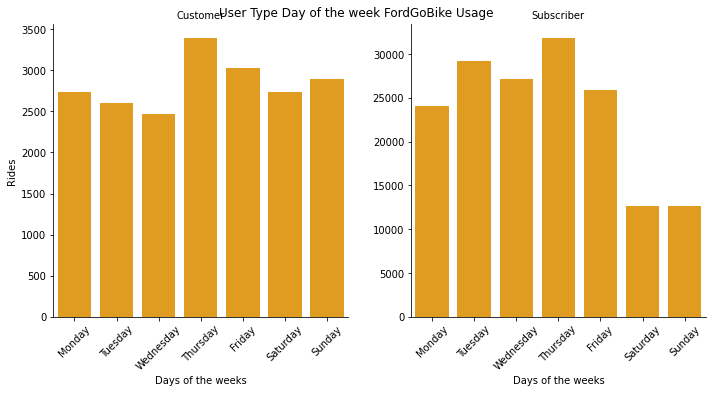

In [12]:
n = sb.catplot(data = df_new , x='day_of_week',col='user_type', kind = 'count',
              sharey = False, color ='orange',order = weekday)
n.set_axis_labels("Days of the weeks","Rides")
n.set_titles("{col_name}")
n.fig.suptitle('User Type Day of the week FordGoBike Usage')
n.set_xticklabels(rotation = 45)

## User type time of the day FordGoBike usage

 Customers do the most trips in the afternoons ,averangely in the morning and lower trips at night while for subscribers most trips are in the morning and afterrnoon

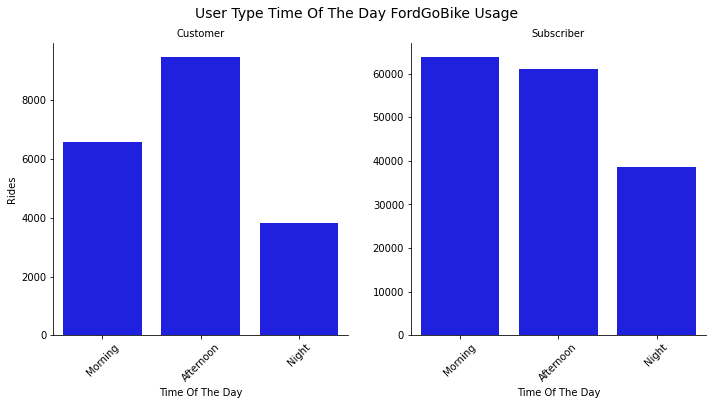

In [13]:
day_time = ['Morning','Afternoon','Night']
n = sb.catplot(data = df_new , x='time_of_day',col="user_type", kind = 'count',
              sharey = False, color ='blue',order = day_time)
n.set_axis_labels("Time Of The Day","Rides")
n.set_titles("{col_name}")
n.fig.suptitle('User Type Time Of The Day FordGoBike Usage', y = 1.03 , fontsize = 14)
n.set_xticklabels(rotation = 45)

##  Average Trip duration for each user type

 Customer rides took longer through out the week as comapred to the subscribers

Text(0, 0.5, 'Average Trip Duration')

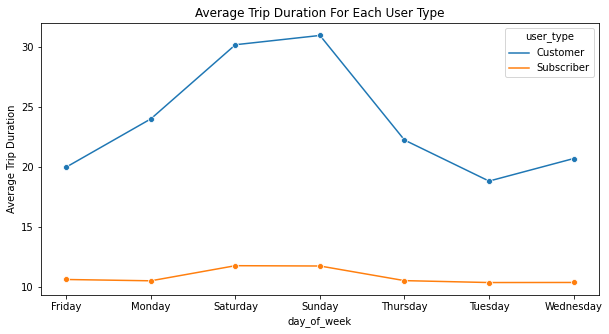

In [15]:
#lets plot a line plot
plt.figure(figsize=[10,5])
sb.lineplot(data = user_weekday_min, x = 'day_of_week', y = 'duration_min', hue ='user_type',
           marker = 'o')
plt.title("Average Trip Duration For Each User Type")
plt.ylabel('Average Trip Duration')

## Average trip duration for each user type across time of day

 Customers trip duration is highest during the afternoon hence its incremental from morning as heads towards the afternoon while also for subscribers we see that afternoon is when as it the highest while both of them have there lowest duration at night

Text(0, 0.5, 'Average Trip Duration')

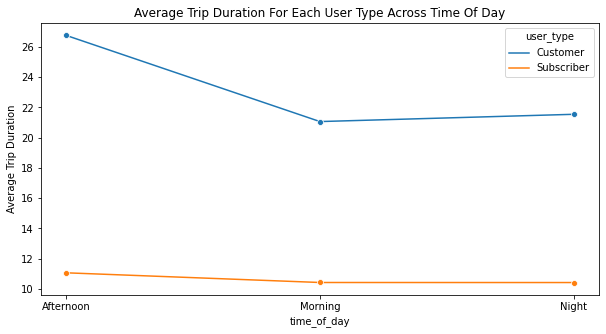

In [16]:
user_day_min = df_new.groupby(['user_type','time_of_day']).duration_min.mean()
user_day_min = user_day_min.reset_index()

#lets plot a line plot
plt.figure(figsize=[10,5])
sb.lineplot(data = user_day_min, x = 'time_of_day', y = 'duration_min', hue ='user_type',
           marker = 'o')
plt.title("Average Trip Duration For Each User Type Across Time Of Day")
plt.ylabel('Average Trip Duration')

In [5]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 771252 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\derri\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\derri\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\derri\AppData\Local\Programs\Python\Python310\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "C:\Users\derri\AppData\Local\Programs\Python\Python310\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\derri\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\con